In [1]:
import pandas as pd

# Carga el archivo csv
df = pd.read_csv('C:\\Users\\juana\\Desktop\\Cursos Python\\ChPM5\\CP-M5\\properties.csv')
df


,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price_USD
0,Argentina,Capital Federal,Villa Crespo,Departamento,2.0,1.0,1.0,37.0,85000.0
1,Argentina,Capital Federal,Palermo,Departamento,6.0,4.0,4.0,300.0,1590000.0
2,Colombia,Atlántico,Barranquilla,Apartamento,3.0,3.0,3.0,95.0,85329.0
3,Colombia,Valle del Cauca,Cali,Apartamento,3.0,3.0,1.0,60.0,22846.0
4,Argentina,Capital Federal,Balvanera,Departamento,3.0,2.0,1.0,45.0,80000.0
...,...,...,...,...,...,...,...,...,...
25655,Colombia,Antioquia,Bello,Apartamento,3.0,3.0,2.0,61.0,41288.0
25656,Argentina,Capital Federal,Caballito,Departamento,2.0,1.0,1.0,40.0,85000.0
25657,Argentina,Capital Federal,Villa del Parque,Departamento,2.0,1.0,1.0,61.0,185700.0
25658,Argentina,Capital Federal,San Cristobal,Departamento,3.0,2.0,1.0,53.0,120000.0


In [2]:
# 3) Asegúrate de que las columnas 'surface_total' y 'price_USD' son numéricas y no contienen valores nulos o inf
df = df[df['surface_total'].notna() & df['price_USD'].notna()]
df = df[df['surface_total'] != 0]

# Calcula el valor por metro cuadrado
df['price_per_sqm'] = df['price_USD'] / df['surface_total']

# Encuentra la propiedad con el mayor valor por metro cuadrado
max_price_per_sqm_property = df[df['price_per_sqm'] == df['price_per_sqm'].max()]

print(max_price_per_sqm_property)


           pais provincia_departamento      ciudad property_type  rooms  \
12408  Colombia           Cundinamarca  Bogotá D.C   Apartamento    3.0   

       bedrooms  bathrooms  surface_total  price_USD  price_per_sqm  
12408       3.0        3.0           10.0   632976.0        63297.6  


In [3]:
# Filtra las propiedades en Argentina
propiedades_argentina = df[df['pais'] == 'Argentina']

# Filtra las propiedades con precio mayor a 100,000 USD
propiedades_mayor_a_100k = propiedades_argentina[propiedades_argentina['price_USD'] > 100000]

# Calcula la cantidad de propiedades
cantidad_propiedades = len(propiedades_mayor_a_100k)

print(f"La cantidad de propiedades en Argentina con un precio mayor a 100,000 USD es: {cantidad_propiedades}")


La cantidad de propiedades en Argentina con un precio mayor a 100,000 USD es: 9397


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

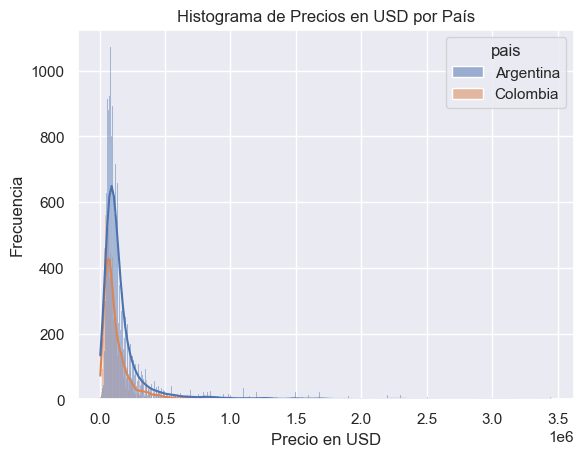

In [5]:

# Crear un objeto de ejes de Matplotlib
fig, ax = plt.subplots()

# Usar Seaborn para crear un gráfico de histograma con la columna 'price_USD'
sns.histplot(data=df, x='price_USD', hue='pais', ax=ax, kde=True)
#sns.histplot(data=df,x='price_USD_m2',hue='pais',ax=ax,kde=True)

# Personalizar el gráfico, agregar títulos, etiquetas, etc., si es necesario
ax.set_title('Histograma de Precios en USD por País')
ax.set_xlabel('Precio en USD')
ax.set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


In [6]:
# Encuentra el precio más alto por noche en las propiedades
precio_mas_alto_por_noche = df['price_USD'].max()

# Imprime el precio más alto por noche (como número entero sin unidades ni decimales)
print(int(precio_mas_alto_por_noche))


3450000


In [7]:
archivo_csv = 'C:\\Users\\juana\\Desktop\\Cursos Python\\ChPM5\\hoteles.csv'

# Carga el archivo CSV en un DataFrame
df_hoteles = pd.read_csv(archivo_csv)
df_hoteles


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [8]:


# 9) Especifica la ubicación del archivo CSV

# Encuentra el precio más alto por noche (como número entero sin unidades ni decimales)
precio_mas_alto_por_noche = df_hoteles['price_per_room'].max()

# Imprime el precio más alto por noche (como número entero sin unidades ni decimales)
print(int(precio_mas_alto_por_noche))


540


In [9]:
# 10) Contar la cantidad de reservas en el dataset
cantidad_de_reservas = df_hoteles.shape[0]

# Imprimir la cantidad de reservas
print("Cantidad de reservas en el dataset:", cantidad_de_reservas)


Cantidad de reservas en el dataset: 36275


In [10]:
# 11) Filtra las filas correspondientes a los años 2018 y 2017
reservas_2018 = df_hoteles[df_hoteles['arrival_year'] == 2018]
reservas_2017 = df_hoteles[df_hoteles['arrival_year'] == 2017]

# Calcula la cantidad de reservas para cada año
cantidad_reservas_2018 = reservas_2018.shape[0]
cantidad_reservas_2017 = reservas_2017.shape[0]

# Calcula el incremento porcentual
incremento_porcentual = ((cantidad_reservas_2018 - cantidad_reservas_2017) / cantidad_reservas_2017) * 100

# Imprime el incremento porcentual
print("Incremento porcentual en la cantidad de reservas entre 2017 y 2018:", incremento_porcentual, "%")


Incremento porcentual en la cantidad de reservas entre 2017 y 2018: 356.87749462695734 %


In [13]:
# 12) Agrupa las reservas por mes y calcula el precio promedio por reserva
precio_promedio_por_mes = df_hoteles.groupby('arrival_month')['price_per_room'].mean()

# Encuentra el mes con el precio promedio más alto
mes_max_precio_promedio = precio_promedio_por_mes.idxmax()

# Imprime el mes con el precio promedio más alto
print("El mes con el precio promedio por reserva más alto es:", mes_max_precio_promedio)
# Septiembre


El mes con el precio promedio por reserva más alto es: 9


In [14]:
# 13) Calcular el porcentaje de reservas que se repiten
porcentaje_repeticion = (df_hoteles['repeated_guest'].sum() / len(df_hoteles)) * 100

# Imprimir el resultado
print(f"Las reservas que se repiten representan aproximadamente el {porcentaje_repeticion:.2f}% del total de reservas.")


Las reservas que se repiten representan aproximadamente el 2.56% del total de reservas.


In [15]:
# 14)# Filtrar las reservas donde hay al menos un niño (no_of_children > 0)
reservas_con_hijos = df_hoteles[df_hoteles['no_of_children'] > 0]

# Agrupar estas reservas por mes y contar cuántas hay en cada mes
reservas_por_mes = reservas_con_hijos.groupby('arrival_month')['Booking_ID'].count()

# Encontrar el mes con la mayoría de reservas
mes_preferido_con_hijos = reservas_por_mes.idxmax()

# Imprimir el resultado
print("El mes preferido por los clientes que tienen hijos es:", mes_preferido_con_hijos)
# Agosto

El mes preferido por los clientes que tienen hijos es: 8


In [16]:
# 15) Filtra el DataFrame para las reservas que tienen 'Meal Plan 1' como tipo de comida
reservas_meal_plan_1 = df_hoteles[df_hoteles['type_of_meal_plan'] == 'Meal Plan 1']

# Calcula el total de reservas para cada tipo de cliente
total_reservas_por_cliente = reservas_meal_plan_1['market_segment_type'].value_counts()

# Encuentra el tipo de cliente con más reservas
cliente_mas_frecuente = total_reservas_por_cliente.idxmax()

print("El tipo de cliente que utiliza en el total de sus reservas el plan de comidas 'Meal Plan 1' es:", cliente_mas_frecuente)


El tipo de cliente que utiliza en el total de sus reservas el plan de comidas 'Meal Plan 1' es: Online


In [17]:
!pip install openpyxl



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: C:\Users\juana\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:

# Especifica la ruta del archivo CSV
ruta_archivo = r'C:\Users\juana\Desktop\Cursos Python\ChPM5\Cajeros_automaticosBD.csv'

# Lee el archivo CSV en un DataFrame
cajeros_df  = pd.read_csv(ruta_archivo)

# Muestra el DataFrame
print(cajeros_df )


         Cajero  Coordenada en X  Coordenada en Y Costo Fijo por Stock Out  \
0      Cajero 1               50              104                     0,39   
1      Cajero 2               24               24                     0,37   
2      Cajero 3                9               48                     0,44   
3      Cajero 4               79               73                      0,3   
4      Cajero 5               13               20                     0,23   
..          ...              ...              ...                      ...   
226  Cajero 227               78               18                      0,4   
227  Cajero 228               35               23                     0,26   
228  Cajero 229              117               79                     0,34   
229  Cajero 230               35               44                     0,18   
230  Cajero 231               37               77                     0,32   

    Costo Variable por Stock Out Duración de la recarga [Horas]

In [30]:
print(cajeros_df.head())

     Cajero  Coordenada en X  Coordenada en Y Costo Fijo por Stock Out  \
0  Cajero 1               50              104                     0,39   
1  Cajero 2               24               24                     0,37   
2  Cajero 3                9               48                     0,44   
3  Cajero 4               79               73                      0,3   
4  Cajero 5               13               20                     0,23   

  Costo Variable por Stock Out Duración de la recarga [Horas]  Lunes  Martes  \
0                         0,04                            0,2      1       1   
1                         0,02                            0,2      0       1   
2                         0,05                            0,3      1       1   
3                         0,05                            0,2      1       1   
4                         0,04                            0,3      1       1   

   Miércoles  Jueves  Viernes  Sábado  Domingo  Turno mañana  Turno tarde 

In [34]:
import pandas as pd

# Especifica la ruta del archivo Excel
ruta_archivo_excel = r'C:\Users\juana\Desktop\Cursos Python\ChPM5\Cajeros.xlsx'

# Lee la hoja 'Retiros' del archivo Excel y crea un DataFrame
retiros_df = pd.read_excel(ruta_archivo_excel, sheet_name='Retiros')

# Muestra el DataFrame
print(retiros_df)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\juana\\Desktop\\Cursos Python\\ChPM5\\Cajeros.xlsx'

In [19]:
# 16)

# Especifica la ubicación del archivo Excel y el nombre de la hoja

nombre_hoja = 'Ubicación Cajeros'
nombre_hoja


# Carga los datos desde la hoja especificada
df_cajeros = pd.read_excel(archivo_excel, sheet_name=nombre_hoja)

# Realiza el análisis de los datos según tus necesidades
# Por ejemplo, puedes contar la cantidad de cajeros que pueden ser reabastecidos al menos 4 días a la semana:
cajeros_reabastecidos_mas_4_dias = df_cajeros[(df_cajeros.iloc[:, 6:13].sum(axis=1) >= 4)]

# Luego, puedes obtener la cantidad de cajeros que cumplen con esta condición:
cantidad_cajeros_mas_4_dias = len(cajeros_reabastecidos_mas_4_dias)

# Imprime la cantidad de cajeros que pueden ser reabastecidos al menos 4 días a la semana
print("Cantidad de cajeros que pueden ser reabastecidos al menos 4 días a la semana:", cantidad_cajeros_mas_4_dias)


Cantidad de cajeros que pueden ser reabastecidos al menos 4 días a la semana: 212


In [20]:
# 17)

# Carga los datos desde la hoja especificada
df_cajeros = pd.read_excel(archivo_excel, sheet_name=nombre_hoja)

# Filtra los cajeros que cumplen con las condiciones:
# Al menos 4 días a la semana, al menos un día en fin de semana, y sin turno de noche
condiciones = (df_cajeros.iloc[:, 6:13].sum(axis=1) >= 4) & ((df_cajeros['Sábado'] == 1) | (df_cajeros['Domingo'] == 1)) & (df_cajeros['Turno noche'] == 0)
cajeros_filtrados = df_cajeros[condiciones]

# Calcula la cantidad de cajeros que cumplen con las condiciones
cantidad_cajeros_cumplen_condiciones = len(cajeros_filtrados)

# Imprime la cantidad de cajeros que cumplen con las condiciones
print(cantidad_cajeros_cumplen_condiciones)


53


In [40]:
import pandas as pd

# Especifica la ruta del archivo
ruta_archivo = r'C:\Users\juana\Desktop\Cursos Python\ChPM5\Cajeros_automaticosBD.xlsx'

# Lee la hoja 'Retiros' del archivo Excel y crea un DataFrame
retiros = pd.read_excel(ruta_archivo, sheet_name='Retiros')

# Muestra el DataFrame
print(retiros)


       Día      Cajero  Monto Hora de la transacción
0        1  Cajero 196   2.70                    0:0
1        1   Cajero 14   2.92                    0:1
2        1  Cajero 143   5.69                    0:3
3        1  Cajero 142   6.74                    0:4
4        1  Cajero 214   2.40                    0:6
...    ...         ...    ...                    ...
98217  102   Cajero 37   5.04                  23:39
98218  102   Cajero 49   2.60                  23:42
98219  102  Cajero 209   3.03                  23:42
98220  102  Cajero 173   6.07                  23:44
98221  102  Cajero 160   5.63                  23:46

[98222 rows x 4 columns]


In [43]:
# Filtra las filas donde la hora de la transacción comienza con '2:'
hora = retiros['Hora de la transacción'].str.contains('^2:')

# Crea un DataFrame con la columna "hora" para contar
d_true = pd.DataFrame(hora)

# Filtra las filas donde la columna "hora" es igual a True (es decir, cumple con la condición)
df = d_true[d_true['Hora de la transacción'] == True]

# Cuenta cuántas filas cumplen con la condición, que corresponde a la cantidad de retiros en ese período
cantidad_retiros_en_madrugada = df.shape[0]

print(f"La cantidad de retiros entre las 2:00 AM y las 2:59 AM es: {cantidad_retiros_en_madrugada}")


La cantidad de retiros entre las 2:00 AM y las 2:59 AM es: 4120


In [47]:
# Filtra los cajeros que no tienen turno noche (Turno noche = 0)
cajeros_filtrados = datos_cajeros[datos_cajeros['Turno noche'] == 0]

# Define una función para contar los días a la semana que pueden ser reabastecidos
def contar_dias_semana(row):
    # Suma los valores de las columnas Lunes a Domingo (1 si es reabastecible, 0 si no lo es)
    return sum(row['Lunes':'Domingo'])

# Aplica la función a cada fila y crea una nueva columna "DiasReabastecibles"
cajeros_filtrados.loc[:, 'DiasReabastecibles'] = cajeros_filtrados.apply(contar_dias_semana, axis=1).copy()


# Filtra los cajeros que pueden ser reabastecidos al menos 4 días a la semana y al menos un día en fin de semana
cajeros_seleccionados = cajeros_filtrados[
    (cajeros_filtrados['DiasReabastecibles'] >= 4) & 
    ((cajeros_filtrados['Sábado'] == 1) | (cajeros_filtrados['Domingo'] == 1))
]

# Cuenta cuántos cajeros cumplen con los criterios
cantidad_cajeros_seleccionados = len(cajeros_seleccionados)

print(f"La cantidad de cajeros que cumplen con los criterios es: {cantidad_cajeros_seleccionados}")



La cantidad de cajeros que cumplen con los criterios es: 53


C:\Users\juana\AppData\Local\Temp\ipykernel_12240\4278987876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cajeros_filtrados.loc[:, 'DiasReabastecibles'] = cajeros_filtrados.apply(contar_dias_semana, axis=1).copy()


In [49]:
# Filtra los cajeros que tienen al menos 4 días a la semana
cajeros_4_dias_o_mas = cajeros_filtrados[cajeros_filtrados['DiasReabastecibles'] >= 4]

# Cuenta cuántos cajeros cumplen con la condición
cantidad_cajeros_4_dias_o_mas = len(cajeros_4_dias_o_mas)

print("La cantidad de cajeros que pueden ser reabastecidos al menos 4 días a la semana es:", cantidad_cajeros_4_dias_o_mas)


La cantidad de cajeros que pueden ser reabastecidos al menos 4 días a la semana es: 53


In [51]:
# Convertir la columna "Monto" al formato numérico adecuado (reemplazando comas por puntos)
retiros_cajero_214['Monto'] = retiros_cajero_214['Monto'].str.replace(',', '.').astype(float)

# Calcular el total de dinero retirado del cajero 214
total_retirado_cajero_214 = retiros_cajero_214['Monto'].sum()

print(f"El total de dinero retirado del cajero 214 es aproximadamente: ${total_retirado_cajero_214:.2f}")



AttributeError: Can only use .str accessor with string values!

In [22]:
#import pandas as pd
#18) 
# Carga el archivo Excel en un DataFrame
#ruta_archivo = r'C:\Users\juana\Desktop\Cursos Python\ChPM5\Cajeros_automaticosBD.xlsx'
#retiros = pd.read_excel(ruta_archivo, sheet_name='Retiros')

# Filtra las filas correspondientes al cajero 214
retiros_cajero_214 = retiros[retiros['Cajero'] == 'Cajero 214']

# Calcula el total de dinero retirado del cajero 214
total_retirado_cajero_214 = retiros_cajero_214['Monto'].sum()

print(f"El total de dinero retirado del cajero 214 es aproximadamente: ${total_retirado_cajero_214:.2f}")


El total de dinero retirado del cajero 214 es aproximadamente: $2072.49


In [23]:
#19)
# Agrupa los datos por el cajero y suma los montos
total_retirado_por_cajero = retiros.groupby('Cajero')['Monto'].sum().reset_index()

# Filtra los cajeros rentables (total > 2200)
cajeros_rentables = total_retirado_por_cajero[total_retirado_por_cajero['Monto'] > 2200]

# Cuenta cuántos cajeros son rentables
cantidad_cajeros_rentables = len(cajeros_rentables)

print(f"La cantidad de cajeros rentables es: {cantidad_cajeros_rentables}")


La cantidad de cajeros rentables es: 103


In [24]:

# Define el rango de tiempo (2:00 AM a 2:59 AM)
hora_inicio = '2:00'
hora_fin = '2:59'

# Filtra las filas que están dentro del rango de tiempo
retiros_en_madrugada = retiros[
    (retiros['Hora de la transacción'] >= hora_inicio) &
    (retiros['Hora de la transacción'] <= hora_fin)
]

# Cuenta cuántos retiros se hicieron en ese período
cantidad_retiros_en_madrugada = len(retiros_en_madrugada)

print(f"La cantidad de retiros entre las 2:00 AM y las 2:59 AM es: {cantidad_retiros_en_madrugada}")


La cantidad de retiros entre las 2:00 AM y las 2:59 AM es: 3775
